Table of the coefficients
        M=0       M=1        M=3            M=9
0  0.104906  0.933871   0.228742       0.271863
1       NaN -1.657930   9.115011     -19.579555
2       NaN       NaN -27.442222     651.348726
3       NaN       NaN  17.907318   -6289.628850
4       NaN       NaN        NaN   29956.709811
5       NaN       NaN        NaN  -80990.902517
6       NaN       NaN        NaN  130040.348571
7       NaN       NaN        NaN -122921.111843
8       NaN       NaN        NaN   63249.658110
9       NaN       NaN        NaN  -13677.306932


/Users/a-tanaka/Documents/Private/Ghq/my.github.com/ara-ta3/ml4se/env/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


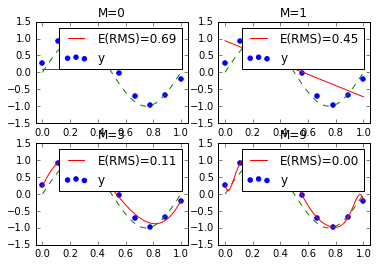

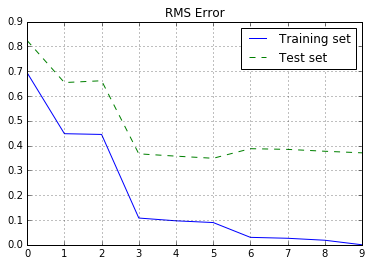

In [3]:
# -*- coding: utf-8 -*-
#
# 誤差関数（最小二乗法）による回帰分析
#
# 2015/04/22 ver1.0
#

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal

#------------#
# Parameters #
#------------#
N=10            # サンプルを取得する位置 x の個数
M=[0,1,3,9]     # 多項式の次数

# データセット {x_n,y_n} (n=1...N) を用意
def create_dataset(num):
    dataset = DataFrame(columns=['x','y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2*np.pi*x) + normal(scale=0.3)
        dataset = dataset.append(Series([x,y], index=['x','y']),
                                 ignore_index=True)
    return dataset

# 平方根平均二乗誤差（Root mean square error）を計算
def rms_error(dataset, f):
    err = 0.0
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        err += 0.5 * (y - f(x))**2
    return np.sqrt(2 * err / len(dataset))

# 最小二乗法で解を求める
def resolve(dataset, m):
    t = dataset.y
    phi = DataFrame()
    for i in range(0,m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi,p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)

    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y

    return (f, ws)

# Main
def main():
    train_set = create_dataset(N)
    test_set = create_dataset(N)
    df_ws = DataFrame()

    # 多項式近似の曲線を求めて表示
    fig = plt.figure()
    for c, m in enumerate(M):
        f, ws = resolve(train_set, m)
        df_ws = df_ws.append(Series(ws,name="M=%d" % m))

        subplot = fig.add_subplot(2,2,c+1)
        subplot.set_xlim(-0.05,1.05)
        subplot.set_ylim(-1.5,1.5)
        subplot.set_title("M=%d" % m)

        # トレーニングセットを表示
        subplot.scatter(train_set.x, train_set.y, marker='o', color='blue')

        # 真の曲線を表示
        linex = np.linspace(0,1,101)
        liney = np.sin(2*np.pi*linex)
        subplot.plot(linex, liney, color='green', linestyle='--')

        # 多項式近似の曲線を表示
        linex = np.linspace(0,1,101)
        liney = f(linex)
        label = "E(RMS)=%.2f" % rms_error(train_set, f)
        subplot.plot(linex, liney, color='red', label=label)
        subplot.legend(loc=1)

    # 係数の値を表示
    print "Table of the coefficients"
    print df_ws.transpose()
    fig.show()

    # トレーニングセットとテストセットでの誤差の変化を表示
    df = DataFrame(columns=['Training set','Test set'])
    for m in range(0,10):   # 多項式の次数
        f, ws = resolve(train_set, m)
        train_error = rms_error(train_set, f)
        test_error = rms_error(test_set, f)
        df = df.append(
                Series([train_error, test_error],
                    index=['Training set','Test set']),
                ignore_index=True)
    df.plot(title='RMS Error', style=['-','--'], grid=True, ylim=(0,0.9))
    plt.show()

if __name__ == '__main__':
    main()

In [4]:
M = [100]
main()

Table of the coefficients
            M=100
0        1.716806
1      -96.138238
2      546.158891
3     -576.387943
4     -510.606120
5    -3137.640591
6    19077.517278
7   -41402.884965
8    33196.896777
9     9317.643417
10   29772.182265
11  -86004.756641
12   10944.645648
13     286.699742
14    8277.805320
15   13241.728050
16   30279.387996
17    2304.966781
18   10483.644802
19    5819.610685
20  -13752.283139
21  -16891.848173
22    2063.438513
23     902.483304
24  -30581.813943
25   -9363.980791
26    3402.749836
27   -5052.416786
28   -5198.237599
29   -3787.935119
..            ...
71  -17857.221576
72   31246.119470
73   17639.132413
74  -20088.233331
75  -16123.986214
76    3905.888054
77  -14463.038499
78   28895.408133
79   -2779.232138
80   14150.159627
81    3327.440240
82   36557.445222
83   -8411.286798
84    4563.062529
85   -3842.422410
86   22731.155193
87   16210.081909
88    6344.652365
89   -2650.618320
90   11642.069102
91   24423.839162
92  -11652.975842
93

### 統計モデル

* 何らかの現象について、統計学的な手法を用いて、それを説明、あるいは予測するモデル（数式）を作り出すこと

In [1]:
%matplotlib inline


In [2]:
main()

NameError: name 'main' is not defined

inlineでグラフ描画する奴↓を実行すればよかったらしい
```
%matplotlib inline
```

In [4]:
N = 100

Table of the coefficients
        M=0       M=1        M=3          M=9
0 -0.013362  0.906196  -0.191937    -0.226332
1       NaN -1.839116  12.204598    15.348911
2       NaN       NaN -36.057037   -95.211961
3       NaN       NaN  24.377721   410.499576
4       NaN       NaN        NaN -1086.164366
5       NaN       NaN        NaN  1308.268498
6       NaN       NaN        NaN  -254.906012
7       NaN       NaN        NaN  -821.174034
8       NaN       NaN        NaN   677.728793
9       NaN       NaN        NaN  -154.019156


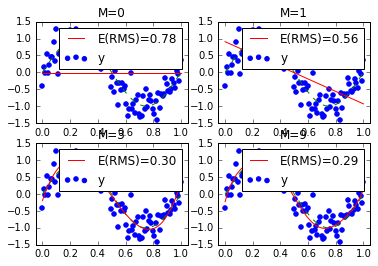

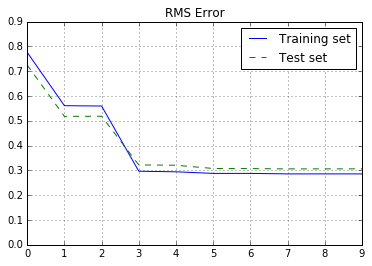

In [5]:
main()

In [6]:
M

[0, 1, 3, 9]

In [7]:
M = [0,1,3,9,20,50]

ValueError: num must be 1 <= num <= 4, not 5

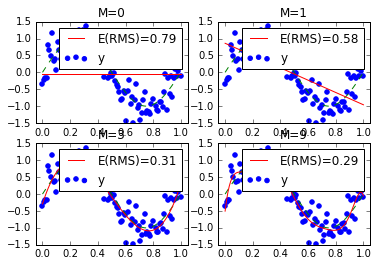

In [8]:
main()

In [9]:
M = [20,50]

main()

In [11]:
N=1000000000